In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from torchvision import models
from visualization.modules import LayeredModule
from visualization.data import *
from visualization.image_proc import *
from visualization.interpret import NetLens

In [16]:
IMAGE_PATH = '../../images/examples/'

In [21]:
original_model = models.alexnet(pretrained=True)
model = LayeredModule.from_nested_cnn(original_model)

In [4]:
original_img, name, target_class = get_example_data(3, img_path=IMAGE_PATH)

In [5]:
prep_img = preprocess_image(original_img)

In [6]:
prep_img.shape

torch.Size([1, 3, 224, 179])

In [7]:
nl = NetLens(model, prep_img, target_class)

In [9]:
target_layer = 'features-conv-4'

In [10]:
cam = nl.generate_cam(target_layer)
cam.shape

torch.Size([224, 179])

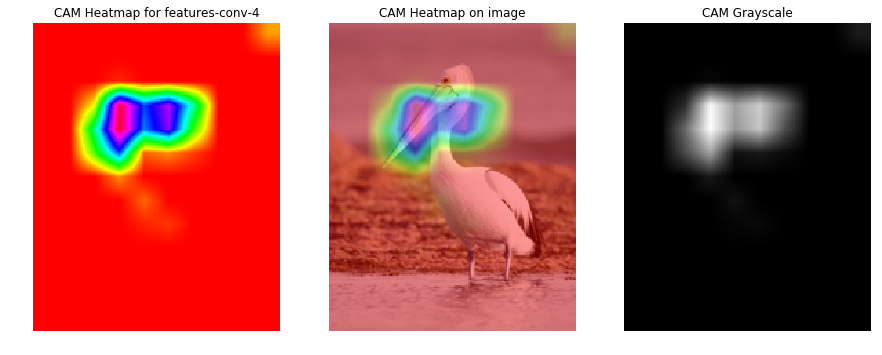

In [11]:
nl.show_gradcam(target_layer)

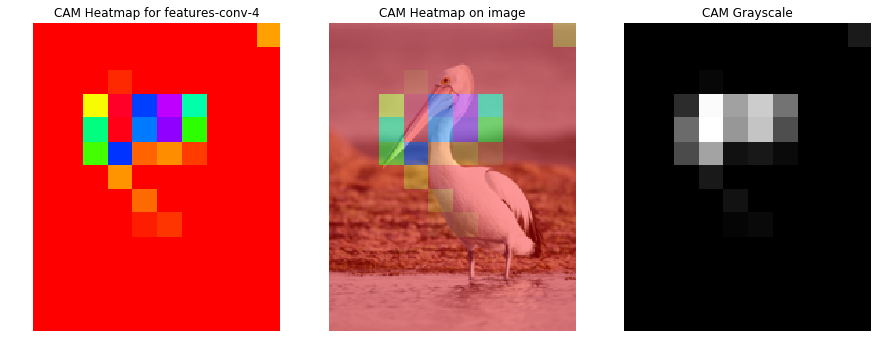

In [12]:
nl.show_gradcam(target_layer, interpolate=False)

In [22]:
def get_gradcam(example_index):
    original_img, name, target_class = get_example_data(example_index, img_path=IMAGE_PATH)
    model = LayeredModule.from_nested_cnn(original_model)
    prep_img = preprocess_image(original_img)
    NetLens(model, prep_img, target_class).show_gradcam('features-relu-4')

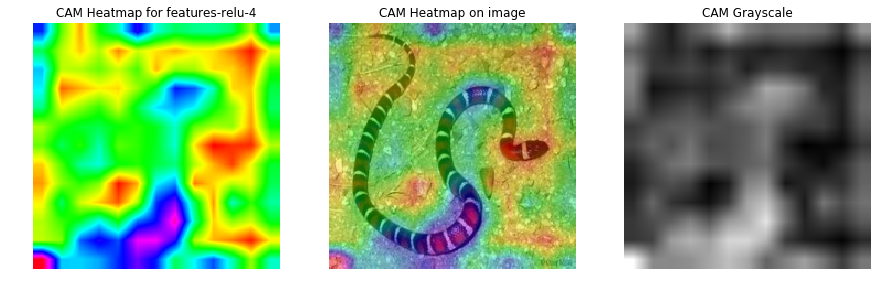

In [18]:
get_gradcam(0)

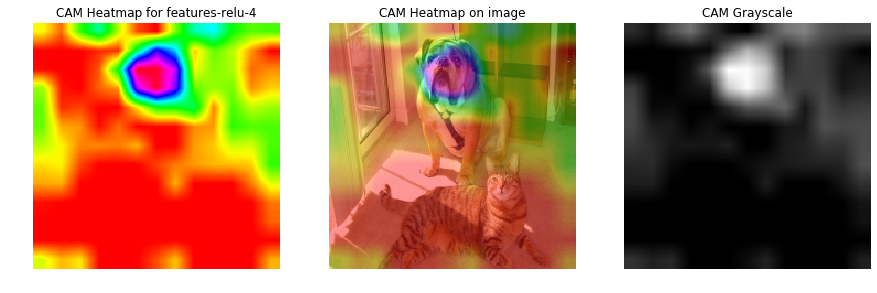

In [19]:
get_gradcam(1)

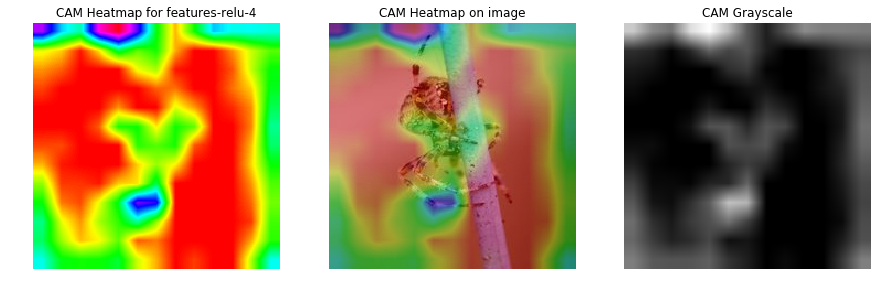

In [20]:
get_gradcam(2)

### Guided GradCAM

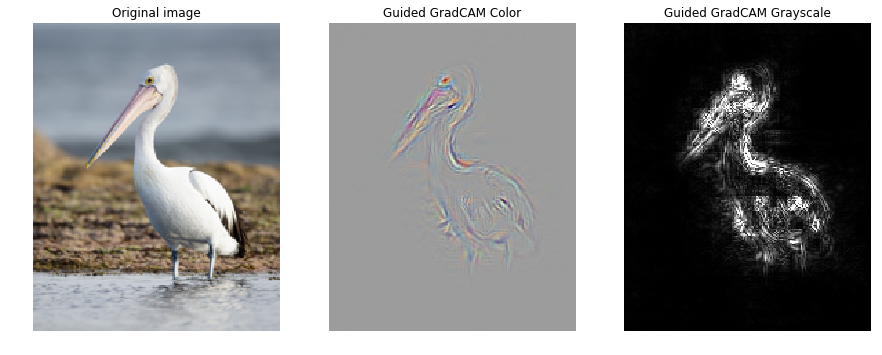

In [14]:
nl.show_guided_gradcam('features-relu-4')

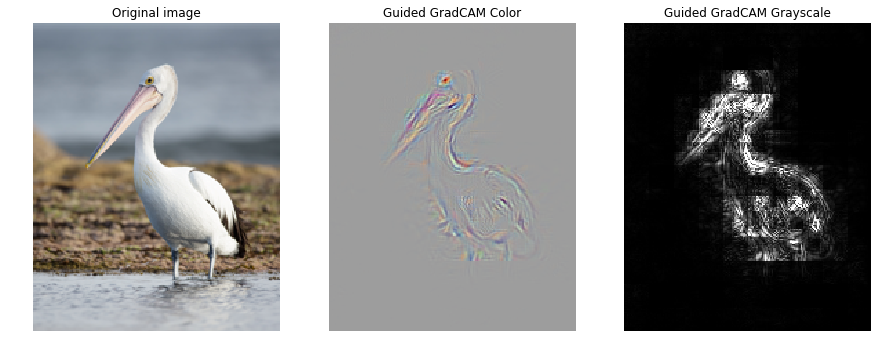

In [15]:
nl.show_guided_gradcam('features-relu-4', interpolate=False)